In [2]:
pip install llama-index-embeddings-huggingface

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.6 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: llama-index-core
    Found existing installation: llama-index-core 0.11.23
    Uninstalling llama-index-core-0.11.23:
      Successfully uninstalled llama-index-core-0.11.23
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llama-index 0.11.23 requires llama-index-core<0.12.0,>=0.11.23, but you have llama-index-core 0.12.0 which is incompatible.
llama-index-agent-openai 0.3.4 requires llama-index-core<0.12.0,>=0.11.0, but you have llama-index-core 0.12.0 which is incompatible.
llama-index-cli 0.3.1 requires llama-index-core<0.12.0,>=0.11.0, but you have llama-index-core 0.12.0 which is incompatible.
llama-index-embeddings-ollama 0.3.1 requires llama-index-core<0.12.0,>=0.11.0, but you have llama-index-core 0.12.0 which is incompatible.
llama-index-embeddings-openai 0.2.5 requires llama-index-core<0.12.0,>=0.11.0, but you have llama-index-core 0.12.0 which is incompatible.
llama-index-indices-managed-llama-cloud 0.4.0 requires llama-index-core<0.12.0,>=0.11.13.post1, but you have llama-index-core 0.12.0 which is incompatible.
llama-in

In [3]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

c:\Users\Muthu\.conda\envs\llamaindex\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Initialize the embedding model
embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")


c:\Users\Muthu\.conda\envs\llamaindex\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Muthu\AppData\Local\llama_index\models--BAAI--bge-small-en-v1.5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [ ]:
# Generate an embedding for a single sentence
single_embedding = embed_model.get_text_embedding("Embeddings represent text as numerical vectors in AI systems.")


In [17]:
print(single_embedding)

[-0.04312014952301979, -0.032511331140995026, -0.007900269702076912, 0.01913871057331562, 0.0571313239634037, -0.0118687953799963, 0.04374675080180168, 0.0010321876034140587, 0.03907960280776024, -0.011626848950982094, -0.006462751422077417, 0.023162567988038063, 0.033017367124557495, -0.0071515655145049095, 0.003255892312154174, 0.04521041736006737, -0.012362447567284107, -0.03992098942399025, -0.1642598807811737, 0.06112540513277054, 0.025696756318211555, 0.05555383116006851, -0.07285913079977036, 0.008418054319918156, 0.0008150721550919116, 0.04746079072356224, -0.01187010109424591, -0.008355215191841125, -0.07727767527103424, -0.07006552815437317, -0.02751280553638935, 0.03288465738296509, 0.010832590982317924, 0.00759076327085495, 0.037777334451675415, -0.03270474076271057, -0.010202650912106037, -0.03217458352446556, -0.017569858580827713, -0.06959385424852371, 0.008905579335987568, -0.09699208289384842, 0.016704315319657326, -0.02117607370018959, -0.04437630623579025, 0.04545803

In [6]:
print(f"Single embedding length: {len(single_embedding)}")

Single embedding length: 384


In [8]:
# Step 2: Define the statements
statements = [
    "The cat is on the mat.",                     # Set 1 - Stmt 1
    "The sun rises in the east.",                 # Unrelated - Stmt 2
    "The feline rests on the carpet.",            # Set 1 - Stmt 3
    "Artificial Intelligence is fascinating.",    # Set 2 - Stmt 4
    "Machine learning drives AI advancements.",   # Set 2 - Stmt 5
    "Birds fly in the sky.",                      # Unrelated - Stmt 6
    "Deep learning is a subset of AI.",           # Set 2 - Stmt 7
    "Cat and Cow are domestic animals",           # Set 1  - Stmt 8
    "Equity, mutual funds and stocks are various options to invest", # Set 3 - Stmt 9
    "Gold can be used as hedge towards the investement", # Set 3 - Stmt 10
    "Nifty and Sensex are major index in India", # Set 3 - Stmt 11
    "Nasdaq, Dow and S&P 100 are major index in India", # Set 3 - Stmt 12
]

In [9]:
# Step 3: Generate embeddings
embeddings = [embed_model.get_text_embedding(statement) for statement in statements]

In [18]:
# Display information about the embeddings
for i, emb in enumerate(embeddings):
    print(f"Embedding {i + 1}: Length = {len(emb)}, First 5 dimensions = {emb[:5]}")

Embedding 1: Length = 384, First 5 dimensions = [0.00478977570310235, -0.022363020107150078, 0.0016347551718354225, 0.07530093193054199, -0.02529618889093399]
Embedding 2: Length = 384, First 5 dimensions = [-0.05574403330683708, -0.04329716041684151, 0.0353211909532547, 0.009184388443827629, 0.06735366582870483]
Embedding 3: Length = 384, First 5 dimensions = [-0.024937506765127182, -0.021155372262001038, 0.023509066551923752, 0.09543333947658539, 0.009970271959900856]
Embedding 4: Length = 384, First 5 dimensions = [-0.017391765490174294, 0.013413519598543644, 0.007511402480304241, -0.032220304012298584, 0.025678975507616997]
Embedding 5: Length = 384, First 5 dimensions = [-0.05465144291520119, 4.213558895571623e-06, 0.04539477080106735, -0.007656008005142212, 0.01425684429705143]
Embedding 6: Length = 384, First 5 dimensions = [0.04943643882870674, -0.057466961443424225, -0.058750901371240616, 0.0074066054075956345, 0.06696583330631256]
Embedding 7: Length = 384, First 5 dimensions

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
# Step 4: Calculate cosine similarity
similarity_matrix = cosine_similarity(embeddings)

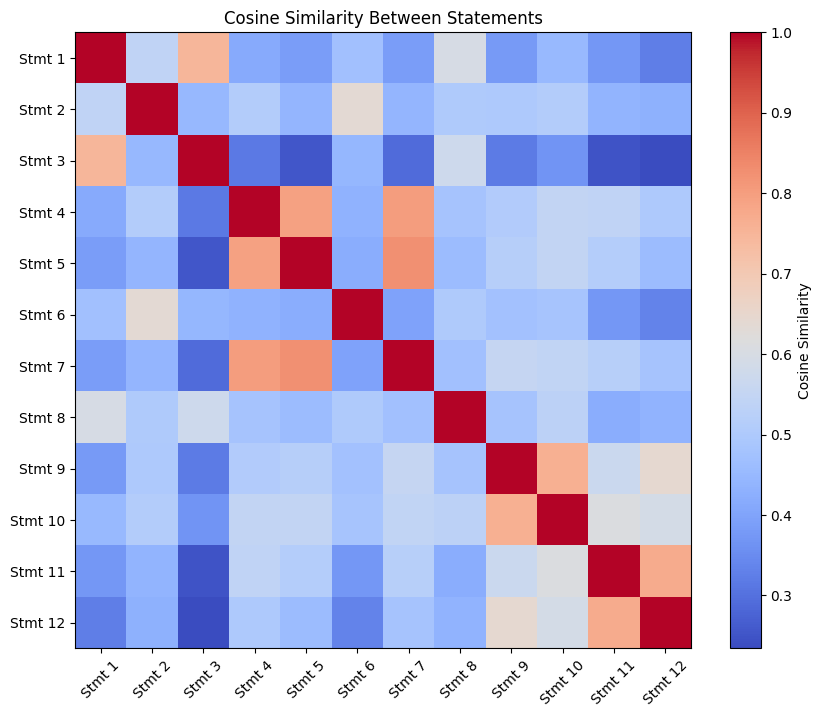

In [13]:
# Step 5: Visualize the similarity matrix
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.xticks(range(len(statements)), [f"Stmt {i+1}" for i in range(len(statements))], rotation=45)
plt.yticks(range(len(statements)), [f"Stmt {i+1}" for i in range(len(statements))])
plt.title("Cosine Similarity Between Statements")
plt.show()

In [14]:

# Step 6: Analyze relationships in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


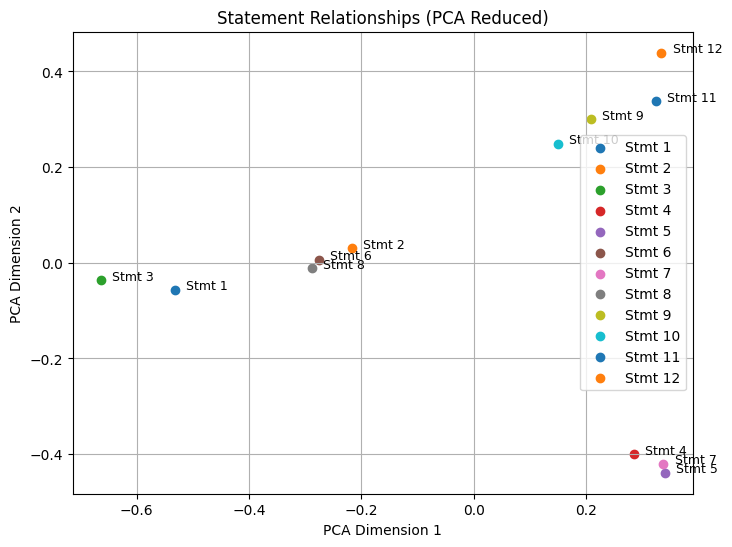

In [15]:

# Scatter plot to visualize relationships
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(reduced_embeddings):
    plt.scatter(x, y, label=f"Stmt {i+1}")
    plt.text(x + 0.02, y, f"Stmt {i+1}", fontsize=9)

plt.title("Statement Relationships (PCA Reduced)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.grid()
plt.show()